## Prediction using Logistic Regression

In [18]:
## import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

#### Load dataset


In [19]:
url = "FINAL Data.csv"
df = pd.read_csv(url)
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
df1 = df[include]
print(df1.head(20))
print(df1.describe())



    Age Gender    Religon        Race  \
0    30      F   Buddhist   Sinhalese   
1    91      F      Islam      Muslim   
2    85      M   Buddhist   Sinhalese   
3    87      M   Buddhist  Sinhalese    
4    59      F   Buddhist   Sinhalese   
5    31      M   Buddhist  Sinhalese    
6    75      F  Christian      Burger   
7    47      M   Buddhist   Sinhalese   
8    58      F  Christian      Burger   
9    36      F      Hindu       Tamil   
10   87      M   Buddhist  Sinhalese    
11   73      F  Christian      Burger   
12   44      M   Buddhist  Sinhalese    
13   62      M   Buddhist   Sinhalese   
14   21      F      Hindu       Tamil   
15   70      M   Buddhist  Sinhalese    
16   68      M      Hindu       Tamil   
17   43      F   Buddhist  Sinhalese    
18   16      M      Other      Burger   
19   35      M      Hindu       Tamil   

                                 Nature Of Occupation Civil Status  \
0   Administrative Executive Managerial & related ...    Unmarried  

#### Data Preprocessing

In [20]:
categoricals = []
for col, col_type in df1.dtypes.iteritems():
     if col_type == 'O':
          categoricals.append(col)
     else:
          df1[col].fillna(0, inplace=True)
         
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df1[col] = labelEncoder.fit_transform(df1[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df1.head(20))


    Age  Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0    30       0        0     3                     0             2   
1    91       0        4     1                    12             1   
2    85       1        0     3                    13             1   
3    87       1        0     4                    16             1   
4    59       0        0     3                     7             2   
5    31       1        0     4                     1             2   
6    75       0        1     0                     4             0   
7    47       1        0     3                    16             1   
8    58       0        1     0                     4             2   
9    36       0        2     5                     4             3   
10   87       1        0     4                    16             1   
11   73       0        1     0                     5             3   
12   44       1        0     4                     1             1   
13   62       1     

c:\users\dinis\pycharmprojects\suicide-risk-prediction-datascience\venv\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\dinis\pycharmprojects\suicide-risk-prediction-datascience\venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



#### Feature Selection


In [21]:
feature_cols = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated']
X = df1[feature_cols] # Features
y = df1['Not Suicide(0)/Suicide(1)']

#### Split the dataset

In [22]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


#### Model Development and Prediction

In [23]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

joblib.dump(logreg, 'model.pkl')
print("model dumped!")

logreg = joblib.load('model.pkl')

model dumped!


c:\users\dinis\pycharmprojects\suicide-risk-prediction-datascience\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Model Evaluation using Confusion Matrix


In [24]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[145,   7],
       [ 12, 136]], dtype=int64)

#### Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

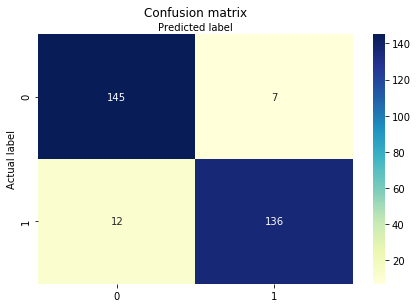

In [25]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.9366666666666666
Precision: 0.951048951048951
Recall: 0.918918918918919


#### ROC Curve


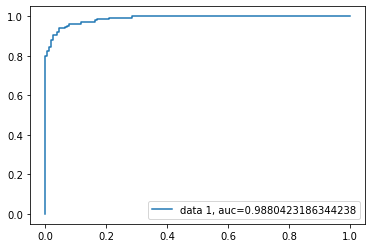

In [27]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#### Data Preprocessing




#### Data Preprocessing




#### Data Preprocessing


